# M2T02 Ejercicio 2

Preparar el dataset movies.dat como un dataframe

---------------------------------------------


Importamos las librerias necesarias

In [19]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Primero abrimos el archivo movies.dat con el bloc de notas y lo guardamos en formato archivo de texto con encoding; 'utf-8'

Posteriormente podremos abrir el archivo txt generado con la orden pd.read_csv()

In [2]:
my_names=['Title', 'Genre']
movies = pd.read_csv('movies.txt', sep='::', encoding='utf-8', names=my_names, usecols=[1,2])

In [3]:
movies.head()

,Title,Genre
0,Toy Story (1995),Animation|Children's|Comedy
1,Jumanji (1995),Adventure|Children's|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama
4,Father of the Bride Part II (1995),Comedy


Observamos como la columna titulo tiene tambien la informacion del año de producción. Extaremos el año de produccion y lo guardamos en una nueva columna del dataframe 'Year' de dtype 'int64'

In [4]:
Year_par= [ peli[-6:] for peli in movies['Title']]

In [5]:
Year= [ year_par[1:5] for year_par in Year_par ]

In [6]:
print(Year[0])

1995


In [7]:
type(Year[0])

str

In [8]:
Year_int=[int(year) for year in Year]

In [9]:
print(Year_int[0], type(Year_int[0]))

1995 <class 'int'>


In [10]:
movies['Year']= Year_int

In [11]:
movies.head()

,Title,Genre,Year
0,Toy Story (1995),Animation|Children's|Comedy,1995
1,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,Grumpier Old Men (1995),Comedy|Romance,1995
3,Waiting to Exhale (1995),Comedy|Drama,1995
4,Father of the Bride Part II (1995),Comedy,1995


In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   3883 non-null   object
 1   Genre   3883 non-null   object
 2   Year    3883 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


Modificamos la columna titulo guardando exclusivamente el titulo.

In [13]:
Title= [ tit[:-7] for tit in movies['Title'] ]

In [14]:
Title[0]

'Toy Story'

In [15]:
movies['Title']=Title

In [16]:
movies.head()

,Title,Genre,Year
0,Toy Story,Animation|Children's|Comedy,1995
1,Jumanji,Adventure|Children's|Fantasy,1995
2,Grumpier Old Men,Comedy|Romance,1995
3,Waiting to Exhale,Comedy|Drama,1995
4,Father of the Bride Part II,Comedy,1995


Observamos que la base de datos tiene 3883 elementos

In [18]:
len(movies)

3883

In [66]:
movies.shape[0]

3883

Cada pelicula tiene los generos dentro de los cuales podria considerarse, separados por el caracter '|'

In [156]:
movies['Genre']

0        Animation|Children's|Comedy
1       Adventure|Children's|Fantasy
2                     Comedy|Romance
3                       Comedy|Drama
4                             Comedy
                    ...             
3878                          Comedy
3879                           Drama
3880                           Drama
3881                           Drama
3882                  Drama|Thriller
Name: Genre, Length: 3883, dtype: object

In [157]:
movies['Genre'][3882]

'Drama|Thriller'

In [43]:
def extract_genres(genres_string):
    genres_list=[]
    genre=''
    for k in range(len(genres_string)):
        if (genres_string[k] != '|'):
            genre= genre + genres_string[k]
        elif (genres_string[k] == '|'):
            genres_list.append(genre)
            genre=''
        
        if (k== (len(genres_string)-1)):
            genres_list.append(genre)
    return genres_list


In [44]:
extract_genres(movies['Genre'][0])

['Animation', "Children's", 'Comedy']

In [87]:
#LOL
def extract_genres2(genres_string):
    return genres_string.split('|')

In [86]:
extract_genres2(movies['Genre'][0])

['Animation', "Children's", 'Comedy']

In [59]:
def extract_all_genres(mov_data):
    all_list=[]
    for i in range(len(mov_data)):
        g_l= extract_genres(mov_data['Genre'][i])
        for j in range(len(g_l)):
            if g_l[j] not in all_list:
                all_list.append(g_l[j])
    return all_list

In [84]:
unique_genres= extract_all_genres(movies)
print(unique_genres)

['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western']


In [73]:
def genre_list_col(movies_data):
    genrelist=[]
    for l in range(movies_data.shape[0]):
        list_l= extract_genres(movies['Genre'][l])
        genrelist.append(list_l)                   
    return genrelist

In [74]:
movies.insert(3, 'Genre_list', genre_list_col(movies) )

In [76]:
movies.head(10)

,Title,Genre,Year,Genre_list
0,Toy Story,Animation|Children's|Comedy,1995,"[Animation, Children's, Comedy]"
1,Jumanji,Adventure|Children's|Fantasy,1995,"[Adventure, Children's, Fantasy]"
2,Grumpier Old Men,Comedy|Romance,1995,"[Comedy, Romance]"
3,Waiting to Exhale,Comedy|Drama,1995,"[Comedy, Drama]"
4,Father of the Bride Part II,Comedy,1995,[Comedy]
5,Heat,Action|Crime|Thriller,1995,"[Action, Crime, Thriller]"
6,Sabrina,Comedy|Romance,1995,"[Comedy, Romance]"
7,Tom and Huck,Adventure|Children's,1995,"[Adventure, Children's]"
8,Sudden Death,Action,1995,[Action]
9,GoldenEye,Action|Adventure|Thriller,1995,"[Action, Adventure, Thriller]"


In [82]:
movies['Genre_list']

0        [Animation, Children's, Comedy]
1       [Adventure, Children's, Fantasy]
2                      [Comedy, Romance]
3                        [Comedy, Drama]
4                               [Comedy]
                      ...               
3878                            [Comedy]
3879                             [Drama]
3880                             [Drama]
3881                             [Drama]
3882                   [Drama, Thriller]
Name: Genre_list, Length: 3883, dtype: object

In [81]:
'Drama' in movies['Genre_list']

False

## Ejercicio 3

Mostrar datos relevantes del datset incluido en movies

---------------------------------------------

Consideraremos las peliculas agrupadas por genero en este dataset

Primero haremos un grafico contando el total de peliculas de cada genero.

Por ultimo haremos una función que dado el año calcule el total de peliculas por genero para ese año especifico

* **d**: diccionario con el total de peliculas por genero

In [98]:
#Inicializo a 0 los generos
d={unique_genres[k]:0 for k in range(len(unique_genres))}

for key in d:
    for l in range(len(movies)):
        if key in movies['Genre_list'][l]:
            d[key]=d[key]+1
print(d)

{'Animation': 105, "Children's": 251, 'Comedy': 1200, 'Adventure': 283, 'Fantasy': 68, 'Romance': 471, 'Drama': 1603, 'Action': 503, 'Crime': 211, 'Thriller': 492, 'Horror': 343, 'Sci-Fi': 276, 'Documentary': 127, 'War': 143, 'Musical': 114, 'Mystery': 106, 'Film-Noir': 44, 'Western': 68}


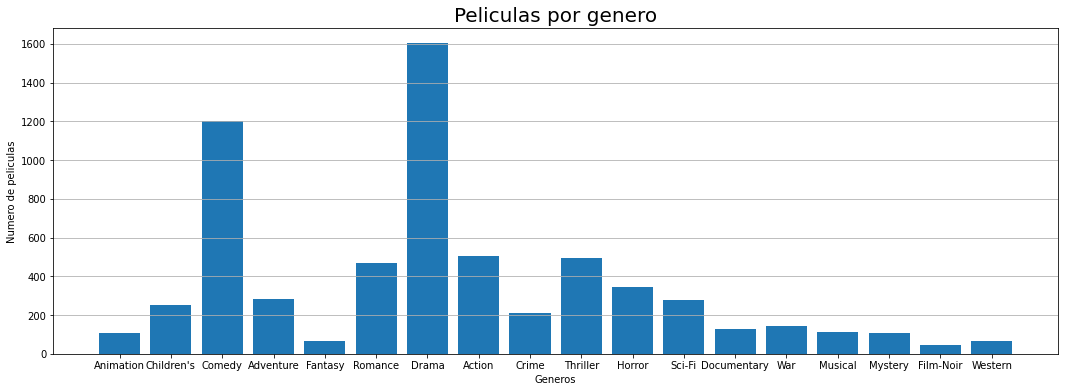

In [99]:
plt.figure(figsize=(18,6))
plt.bar(d.keys(), d.values())
plt.title('Peliculas por genero', fontsize=20)
plt.xlabel('Generos')
plt.ylabel('Numero de peliculas')
plt.grid(axis= 'y')
plt.show()

In [144]:
mov_1995=movies[movies['Year']==1995]

In [146]:
mov_1995.shape

(342, 4)

In [161]:
mov_1995['Genre'].iloc[341]

'Horror|Sci-Fi'

* La funcion **pelis_año(dataset, año)** devuelve un diccionario con el total de peliculas incluidas en el dataframe **dataset** por genero para el año especificado.

In [157]:
def pelis_año(dataset, año):
    d={unique_genres[k]:0 for k in range(len(unique_genres))}
    m_year= dataset[ dataset['Year'] == año]
    for key in d:
        for k in range(len(m_year)):
            if key in m_year['Genre_list'].iloc[k]:
                d[key]=d[key]+1
    return d

In [159]:
d2= pelis_año(movies,1995)

In [162]:
'Animation' in movies['Genre_list'][0]

True

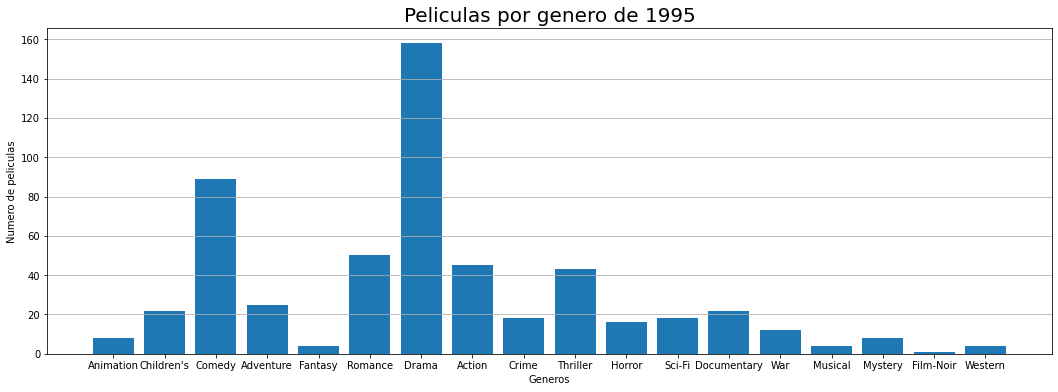

In [163]:
plt.figure(figsize=(18,6))
plt.bar(d2.keys(), d2.values())
plt.title('Peliculas por genero de 1995', fontsize=20)
plt.xlabel('Generos')
plt.ylabel('Numero de peliculas')
plt.grid(axis= 'y')
plt.show()